In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/seattle/calendar.csv
/kaggle/input/seattle/listings.csv
/kaggle/input/seattle/reviews.csv


In [2]:
# We have 3 dataset, 
#  Lets take a look what are they

# 1) Here I am going to observe room prices regarding to date
# 2) Effects of client reviews on price.
# 3) Finally we are going to 

In [3]:
# this dataframe shows  prices-dates-listing_id and availability
# so that we can may be extract some information of the seasonality of the prices 
df_cal=pd.read_csv("//kaggle/input/seattle/calendar.csv")
df_cal.head()


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
# First of all I want to drop the rows that doesnt have price data
df_cal=df_cal.dropna(subset=["price"])
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00


In [5]:
#Let's check the unique values of the price column
print(df_cal.price.unique())

['$85.00' '$125.00' '$154.00' '$164.00' '$165.00' '$150.00' '$145.00'
 '$144.00' '$148.00' '$155.00' '$149.00' '$156.00' '$166.00' '$152.00'
 '$147.00' '$146.00' '$151.00' '$158.00' '$168.00' '$169.00' '$192.00'
 '$175.00' '$162.00' '$171.00' '$173.00' '$153.00' '$177.00' '$183.00'
 '$181.00' '$170.00' '$179.00' '$167.00' '$184.00' '$186.00' '$172.00'
 '$180.00' '$190.00' '$178.00' '$196.00' '$197.00' '$202.00' '$198.00'
 '$205.00' '$214.00' '$218.00' '$211.00' '$193.00' '$204.00' '$189.00'
 '$187.00' '$194.00' '$185.00' '$206.00' '$191.00' '$207.00' '$208.00'
 '$188.00' '$200.00' '$209.00' '$210.00' '$195.00' '$201.00' '$199.00'
 '$203.00' '$182.00' '$163.00' '$159.00' '$157.00' '$142.00' '$136.00'
 '$134.00' '$137.00' '$143.00' '$135.00' '$141.00' '$130.00' '$138.00'
 '$133.00' '$129.00' '$127.00' '$126.00' '$131.00' '$132.00' '$220.00'
 '$222.00' '$223.00' '$232.00' '$217.00' '$229.00' '$294.00' '$358.00'
 '$439.00' '$400.00' '$975.00' '$750.00' '$500.00' '$650.00' '$675.00'
 '$1,25

In [6]:
#Let's check the unique values of the available column
print(df_cal.available.unique())
#Let's check distribution of the prices
# but because of this  we have to get rid of $ sign  and make price column int
df_cal["price"]=df_cal["price"].str.strip("$")
df_cal.head()
# str.strip is used with df.["column_name"]  if you try df.column_name it gives error.

['t']


,listing_id,date,available,price
0,241032,2016-01-04,t,85.00
1,241032,2016-01-05,t,85.00
9,241032,2016-01-13,t,85.00
10,241032,2016-01-14,t,85.00
14,241032,2016-01-18,t,85.00


In [7]:
#Let's check the unique values of the available column again
print(df_cal.price.unique())

['85.00' '125.00' '154.00' '164.00' '165.00' '150.00' '145.00' '144.00'
 '148.00' '155.00' '149.00' '156.00' '166.00' '152.00' '147.00' '146.00'
 '151.00' '158.00' '168.00' '169.00' '192.00' '175.00' '162.00' '171.00'
 '173.00' '153.00' '177.00' '183.00' '181.00' '170.00' '179.00' '167.00'
 '184.00' '186.00' '172.00' '180.00' '190.00' '178.00' '196.00' '197.00'
 '202.00' '198.00' '205.00' '214.00' '218.00' '211.00' '193.00' '204.00'
 '189.00' '187.00' '194.00' '185.00' '206.00' '191.00' '207.00' '208.00'
 '188.00' '200.00' '209.00' '210.00' '195.00' '201.00' '199.00' '203.00'
 '182.00' '163.00' '159.00' '157.00' '142.00' '136.00' '134.00' '137.00'
 '143.00' '135.00' '141.00' '130.00' '138.00' '133.00' '129.00' '127.00'
 '126.00' '131.00' '132.00' '220.00' '222.00' '223.00' '232.00' '217.00'
 '229.00' '294.00' '358.00' '439.00' '400.00' '975.00' '750.00' '500.00'
 '650.00' '675.00' '1,250.00' '1,450.00' '1,650.00' '100.00' '600.00'
 '450.00' '475.00' '120.00' '140.00' '80.00' '42.00' '4

In [8]:
# to be able to convert price column to float we replaced , with nothing...
df_cal["price"]=df_cal["price"].str.replace(",","")
print(df_cal.price.unique())

['85.00' '125.00' '154.00' '164.00' '165.00' '150.00' '145.00' '144.00'
 '148.00' '155.00' '149.00' '156.00' '166.00' '152.00' '147.00' '146.00'
 '151.00' '158.00' '168.00' '169.00' '192.00' '175.00' '162.00' '171.00'
 '173.00' '153.00' '177.00' '183.00' '181.00' '170.00' '179.00' '167.00'
 '184.00' '186.00' '172.00' '180.00' '190.00' '178.00' '196.00' '197.00'
 '202.00' '198.00' '205.00' '214.00' '218.00' '211.00' '193.00' '204.00'
 '189.00' '187.00' '194.00' '185.00' '206.00' '191.00' '207.00' '208.00'
 '188.00' '200.00' '209.00' '210.00' '195.00' '201.00' '199.00' '203.00'
 '182.00' '163.00' '159.00' '157.00' '142.00' '136.00' '134.00' '137.00'
 '143.00' '135.00' '141.00' '130.00' '138.00' '133.00' '129.00' '127.00'
 '126.00' '131.00' '132.00' '220.00' '222.00' '223.00' '232.00' '217.00'
 '229.00' '294.00' '358.00' '439.00' '400.00' '975.00' '750.00' '500.00'
 '650.00' '675.00' '1250.00' '1450.00' '1650.00' '100.00' '600.00'
 '450.00' '475.00' '120.00' '140.00' '80.00' '42.00' '49.0

In [9]:
# convert the prices to float
df_cal["price"]=df_cal["price"].astype(float)
df_cal.dtypes

listing_id      int64
date           object
available      object
price         float64
dtype: object

'"As you can see we have a skewed distribution as the price increases the available rooms decrease this also shows us there are\na few rich people to accomodate at hight price rooms. :) :) '

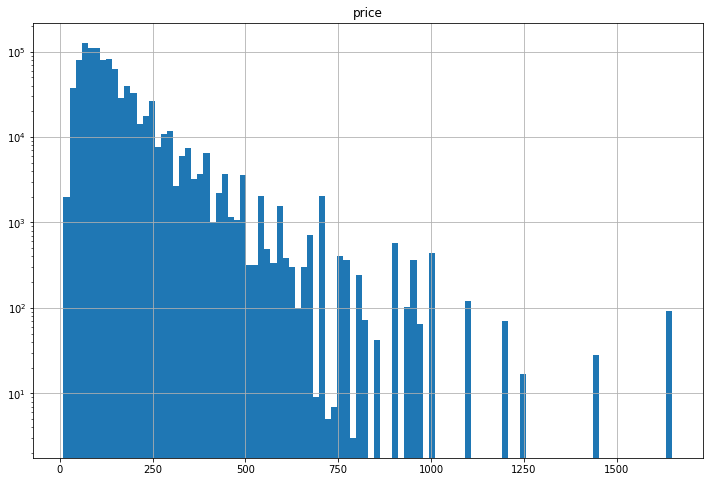

In [10]:
from matplotlib import pyplot as plt
# I want to visualise price distribution because of this I imported  pyplot
# Creating histogram
ax = df_cal.hist(column="price", bins=100,log=True, figsize=(12, 8))
# quantity distribution is too wide and so to be able to see outliers I used logaritmic histogram 
""""As you can see we have a skewed distribution as the price increases the available rooms decrease this also shows us there are
a few rich people to accomodate at hight price rooms. :) :) """

In [11]:
# I checked if do I have nan value at date column
df_cal['date'].isnull().sum()

0

In [12]:
# Now I want to format the date data of the dataframe  our data  has %Y-%m-%d  form because of that I am going to use to_datetime function 
#now we transformed our date data to datetime data
df_cal['date'] = pd.to_datetime(df_cal['date'],format="%Y-%m-%d")
df_cal['date']

0         2016-01-04
1         2016-01-05
9         2016-01-13
10        2016-01-14
14        2016-01-18
             ...    
1393207   2016-01-06
1393208   2016-01-07
1393211   2016-01-10
1393212   2016-01-11
1393213   2016-01-12
Name: date, Length: 934542, dtype: datetime64[ns]

In [13]:
# dt.year extract  year value from the datetime data
df_cal['year'] = df_cal['date'].dt.year
df_cal.head()

,listing_id,date,available,price,year
0,241032,2016-01-04,t,85.0,2016
1,241032,2016-01-05,t,85.0,2016
9,241032,2016-01-13,t,85.0,2016
10,241032,2016-01-14,t,85.0,2016
14,241032,2016-01-18,t,85.0,2016


In [14]:
# I follow the same procedure  for month and day 
df_cal['month'] = df_cal['date'].dt.month
df_cal['day'] = df_cal['date'].dt.day
df_cal['day_name'] = df_cal['date'].dt.day_name()
df_cal['day_num'] = df_cal['date'].dt.weekday
df_cal.head()

,listing_id,date,available,price,year,month,day,day_name,day_num
0,241032,2016-01-04,t,85.0,2016,1,4,Monday,0
1,241032,2016-01-05,t,85.0,2016,1,5,Tuesday,1
9,241032,2016-01-13,t,85.0,2016,1,13,Wednesday,2
10,241032,2016-01-14,t,85.0,2016,1,14,Thursday,3
14,241032,2016-01-18,t,85.0,2016,1,18,Monday,0


In [15]:
# Lets check which years are there in our dataframe
df_cal["year"].unique()
# great I am going to make my analysis from the beginning of 2016 to the end of 2016 so that I can drop 2017 data.

array([2016, 2017])

In [16]:
#Drops the rows where year is 2017
df_cal.drop(df_cal[df_cal['year'] == 2017].index, inplace = True)
df_cal["year"].unique()

array([2016])

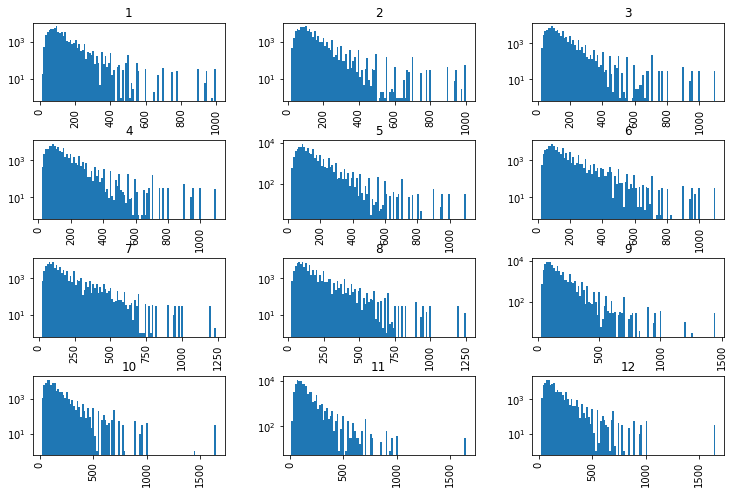

In [17]:
#great lets  compare price data  regarding to the month  and day 
ax = df_cal.hist(column="price",by="month", bins=100,log=True, figsize=(12, 8))

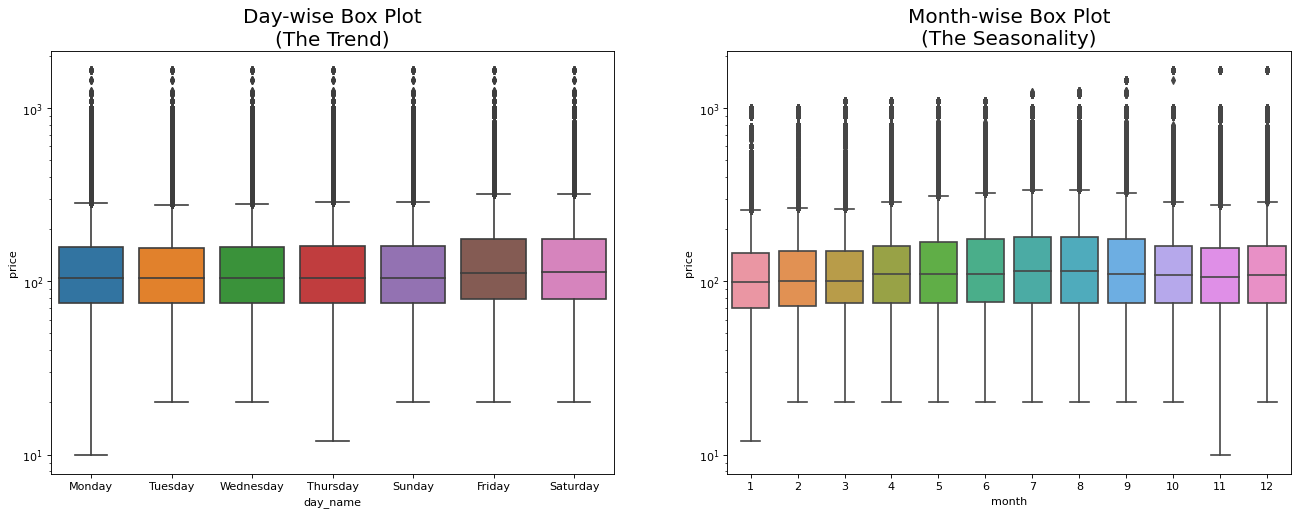

In [18]:
import seaborn as sns
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='day_name', y='price', data=df_cal, ax=axes[0])
sns.boxplot(x='month', y='price', data=df_cal, ax=axes[1])
axes[1].set_yscale("log")
axes[0].set_yscale("log")
# Set Title
axes[0].set_title('Day-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18);
plt.show()

Here I can see that  Fridays and Saturday prices are increasing slightly. Beginning of the week and thursdays  we can see the minimum prices . Monday syndrome and overwhelming mid week can cause this.:)

![](https://cdn.hikb.at/charts/meteo-average-weather/seattle-meteo-average-weather.png)

Then Lets take a look to monthly data  as you can see sunny days summer days, prices are increasing. It seems that tourism is booming, demand is booming between 6th, 9th months of the year.

In [19]:
# Ok lets go to the next dataframe listings.csv

df_listing=pd.read_csv("//kaggle/input/seattle/listings.csv")
df_listing.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [20]:
# there are alot of columns so lets  check these column name to understand better
df_listing.columns
#df_listing["price"]
#df_listing["weekly_price"]
#df_listing["monthly_price"]

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [21]:
# So lets compare the prices with some other features 
df_listing["price"]=df_listing["price"].str.strip("$")
df_listing["price"]=df_listing["price"].str.replace(",","")
df_listing["price"]=df_listing["price"].astype(float)
df_listing["weekly_price"]=df_listing["weekly_price"].str.strip("$")
df_listing["weekly_price"]=df_listing["weekly_price"].str.replace(",","")
df_listing["weekly_price"]=df_listing["weekly_price"].astype(float)
df_listing["monthly_price"]=df_listing["monthly_price"].str.strip("$")
df_listing["monthly_price"]=df_listing["monthly_price"].str.replace(",","")
df_listing["monthly_price"]=df_listing["monthly_price"].astype(float)


In [22]:
# clean nan rows where prices have
df_listing.dropna(subset=["price","weekly_price","monthly_price"], inplace=True) 

In [23]:
df_listing[["price","weekly_price","monthly_price"]]
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.22
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.55
11,4454295,https://www.airbnb.com/rooms/4454295,20160104002432,2016-01-04,Upper Queen Anne Craftsman House,"Beautifully furnished, cozy 1 bedroom mid cent...",Beautiful home in an extremely walkable neighb...,"Beautifully furnished, cozy 1 bedroom mid cent...",none,I am located in the Upper Queen Anne neighborh...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.98


In [24]:
 df_listing.accommodates 

1       4
3       3
8       2
9       4
11      2
       ..
3801    2
3802    4
3809    4
3810    5
3812    4
Name: accommodates, Length: 1417, dtype: int64

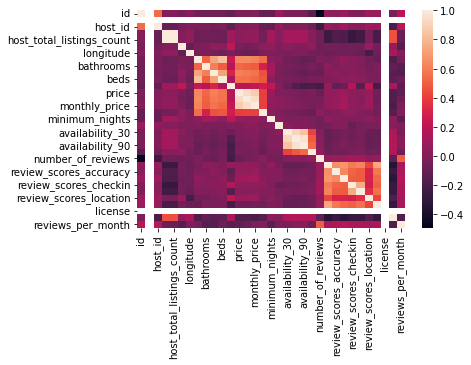

In [25]:
# to quickly check the datas we can get something  I am going to use a heatmap
sns.heatmap(df_listing.corr())
plt.show()


In [26]:
# here I created a correlation matrix 
corr_mtx=df_listing.corr().abs()

In [27]:
# Unstack the matrix to filter
corr_list = corr_mtx.unstack()
# drop the nan values
corr_list.dropna(inplace=True)
# filtered the  strong correlated pairs
corr_strong = corr_list[corr_list>0.8][corr_list<1]
corr_strong


accommodates     beds               0.825912
beds             accommodates       0.825912
price            weekly_price       0.932105
                 monthly_price      0.875837
weekly_price     price              0.932105
                 monthly_price      0.942644
monthly_price    price              0.875837
                 weekly_price       0.942644
availability_30  availability_60    0.916197
                 availability_90    0.838263
availability_60  availability_30    0.916197
                 availability_90    0.964067
availability_90  availability_30    0.838263
                 availability_60    0.964067
dtype: float64

Actually data above doesnt give use a significant informations because mid to strong correlation coefficient datas are almost same type datas. So that I am going to check weak to mid corellated datas.

In [28]:
# filtered the  high correlated pairs
corr_high = corr_list[corr_list>0.5][corr_list<0.8]
corr_high

id                           host_id                        0.537998
host_id                      id                             0.537998
accommodates                 bathrooms                      0.512195
                             bedrooms                       0.726510
                             price                          0.630279
                             weekly_price                   0.635608
                             monthly_price                  0.609972
                             guests_included                0.541733
bathrooms                    accommodates                   0.512195
                             bedrooms                       0.601564
                             price                          0.524216
                             weekly_price                   0.502086
bedrooms                     accommodates                   0.726510
                             bathrooms                      0.601564
                             beds 

price               /         accommodates        /           0.630279
                    ///         bathrooms           /           0.524216
                    ///         bedrooms            /           0.600145
                    ///         beds                /           0.561753
weekly_price        /         accommodates        /           0.635608
                    ///         bathrooms           /           0.502086
                    ///         bedrooms            /           0.581564
                    ///         beds                /           0.555153
monthly_price       /         accommodates        /           0.609972
                    ///         bedrooms            /           0.560460
                    ///         beds                /           0.524035
                             
Here we can see that  the size of the house and prices are related But actually this is not a surprising  info

In [29]:
corr_filtered_mid = corr_list[corr_list<0.5][corr_list>0.3]
corr_filtered_mid

id                              number_of_reviews                 0.490398
host_listings_count             calculated_host_listings_count    0.457109
host_total_listings_count       calculated_host_listings_count    0.457109
bathrooms                       beds                              0.490360
                                monthly_price                     0.489599
bedrooms                        square_feet                       0.303474
                                guests_included                   0.454142
beds                            bathrooms                         0.490360
                                guests_included                   0.470952
square_feet                     bedrooms                          0.303474
price                           guests_included                   0.394971
weekly_price                    guests_included                   0.402296
monthly_price                   bathrooms                         0.489599
                         

price                           guests_included                   0.394971
weekly_price                    guests_included                   0.402296

Maybe this data can be interesting.  guests_included   feature is related with price. So that this option can be taken into account for higher rent incomes.

In [30]:
corr_filtered_weak = corr_list[corr_list<0.3][corr_list>0.2]
corr_filtered_weak

host_id                         number_of_reviews                 0.242441
host_listings_count             review_scores_rating              0.254140
                                review_scores_checkin             0.271076
                                review_scores_communication       0.231903
                                review_scores_value               0.201750
host_total_listings_count       review_scores_rating              0.254140
                                review_scores_checkin             0.271076
                                review_scores_communication       0.231903
                                review_scores_value               0.201750
latitude                        square_feet                       0.215438
longitude                       review_scores_location            0.215361
accommodates                    square_feet                       0.226254
bathrooms                       guests_included                   0.295379
square_feet              

In [31]:
corr_filtered_low = corr_list[corr_list<0.1][corr_list>0]
corr_filtered_low

id                 host_listings_count          0.010000
                   host_total_listings_count    0.010000
                   latitude                     0.041004
                   longitude                    0.016384
                   accommodates                 0.057244
                                                  ...   
reviews_per_month  maximum_nights               0.022952
                   availability_30              0.032513
                   availability_60              0.008958
                   availability_90              0.016140
                   availability_365             0.074540
Length: 610, dtype: float64

In [37]:
df_listing.shape

(1417, 92)

In [38]:
df_cal.shape

(928844, 9)

In [94]:
# ok right now I want to make a sentiment analysis and see  if high price accomodations  results with contant people of not
df_rew=pd.read_csv("//kaggle/input/seattle/reviews.csv")
df_rew.head()
df_rew.shape

(84849, 6)

In [103]:
"""" to be able to achineve that I am going to merge  df_cal and df_rew however there are too many listing price for the same listing_id so that 
I am going to create a new dataframe that takes the average price for the same listing_id"""

df_price = df_cal.groupby("listing_id").agg({'price': ['mean']})
df_price.columns

MultiIndex([('price', 'mean')],
           )

In [106]:
# now lets  put  price data into  df_rew dataframe
df_nlp = pd.merge(df_rew, df_price, how="left", on=["listing_id"])
df_nlp["price[mean]"]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  


KeyError: 'price[mean]'

In [89]:
# I want to add one more feature there from the listing dataframe I am going to take 
#df_rev_score = df_listing[['id','review_scores_rating']].dropna()
#df_rev_score.rename(columns = {'id':'listing_id'}, inplace = True)
#df_rev_score.shape

(1263, 2)

In [ ]:
#here I want to write a tokenizer function 
import nltk
import nltk.tokenize import word_tokenize
import re
nltk.download("punkt")
nltk.download("stopwords")
from nltk.corpus import stopwords
nltk.download("wordnet")
from nltk.stem.wordnet import WordNetLemmatizer
def tokenize(text):
    text = text.lower()
    text= re.sub(r"[^a-zA-Z0-9]", " ", text)
    
    #Split text into words using NLTK
    words = word_tokenize(text)
    
    # Remove stop words
    words = [w for w in words if w not in stopwords.words("english")]
    
    # Reduce words to their root form
    lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
    
    return lemmed

In [ ]:
# before we classify  reviews

In [ ]:
#Here I am going to use a ML pipeline to analyse  review messages
#from sklearn.utils import indexable, _safe_indexing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
#from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

X, y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y)
pipeline = Pipeline([('vect', CountVectorizer(tokenizer=tokenize)), ('tfidf', TfidfTransformer()), ('clf', RandomForestClassifier())])


In [33]:
break

SyntaxError: 'break' outside loop (668683560.py, line 4)

In [ ]:
#df_cal.head()

In [ ]:
# Remove commas in price
#df_cal['price'] = df_cal['price'].apply(lambda x:''.join(x.split('.')[0]))
#df_cal['price'] = df_cal['price'].apply(lambda x:x.replace(',',""))

In [ ]:

#df_cal.head()

In [ ]:


# Convert price to numeric data
#df_cal['price'] = df_cal['price'].apply(lambda x:float(x.split('$')[1]))


In [ ]:
""""df_cal['date'] = pd.to_datetime(df_cal['date'],format="%Y-%m-%d")
df_cal['year'] = df_cal['date'].dt.year
df_cal['month'] = df_cal['date'].dt.month
df_cal['day'] = df_cal['date'].dt.day
df_cal['day_name'] = df_cal['date'].dt.day_name()
df_cal['day_num'] = df_cal['date'].dt.weekday
df_cal.head()


In [ ]:
#Covert available to numeric data
#df_cal['available'] = df_cal['available'].apply(lambda x:1 if x =='t' else 0)

In [ ]:
df_cal.head()

In [ ]:
# Plot average price and total number of listings per month to see seasonal patterns
""""import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
fig,ax = plt.subplots()
ax.plot(df_cal[df_cal.year==2016].groupby(['month']).price.mean(),color='blue', marker='o', linewidth=3, label='Price')
ax.set_xlabel('Month')
ax.set_ylabel('Average Price, $')



ax.legend(loc=2)


plt.title('Seasonal Change of Price and # of Available Listings')
plt.show()

In [ ]:
# Plot average price and total listing to weekly patterns
fig,ax = plt.subplots()
ax.plot(df_cal.groupby(['day_num']).price.mean(),color='slategrey', marker='o', linewidth=3, label='Price')
ax.set_xlabel('Day')
ax.set_ylabel('Average Price, $')



ax.legend(loc=2)

plt.title('Weekly Change of Price and # of Available Listings')
plt.show()

In [ ]:
# Graphs show that  June-July-August prices are higher than other months so that we can see at warmer months prices increases.
# Daily graph shows that Friday and Saturday prices are hight than other days,
# so that we can we can think that people generally seek for accomodation for weekend holiday.

In [ ]:
# Here we are going to observe  listing properties-price relation.

In [ ]:
df_list=pd.read_csv("//kaggle/input/seattle/listings.csv")
df_list.info()

In [ ]:
def clear_dollar(price):

# Remove commas in price
    if type(price)==str:
        price=price[1:].replace(",","")
        price=float(price)
    return price

In [ ]:
df_list.dropna(axis=0,subset=["price"], inplace=True)
#Convert dollar dtype to float
df_list['price'] = df_list['price'].apply(lambda x:clear_dollar(x))
df_list['monthly_price'] = df_list['monthly_price'].apply(lambda x:clear_dollar(x))
df_list['weekly_price'] = df_list['weekly_price'].apply(lambda x:clear_dollar(x))
df_list['security_deposit'] = df_list['security_deposit'].apply(lambda x:clear_dollar(x))
df_list['cleaning_fee'] = df_list['cleaning_fee'].apply(lambda x:clear_dollar(x))
df_list['extra_people'] = df_list['extra_people'].apply(lambda x:clear_dollar(x))


In [ ]:
df_list

In [ ]:
df_list.hist(figsize=(20,20))
plt.show()

In [ ]:
sns.heatmap(df_list.corr())
plt.show()
df_list.corr()['reviews_per_month'].sort_values()

In [ ]:
df_list.corr()['price'].sort_values(ascending=False).plot.bar(y=200,x=8000)
plt.xticks(rotation=90)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns

In [ ]:
 #Split into explanatory and response variables
X = df_cal_price.drop(["price","listing_id"], axis=1)
y = df_cal_price["price"]

    #Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

    #Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

test_score


In [ ]:
train_score

In [ ]:
type(y_test_preds)

In [ ]:
result=pd.DataFrame(y_test_preds,y_test)

In [ ]:
result

In [ ]:
df_list=pd.read_csv("/kaggle/input/seattle/listings.csv")
df_list.head()

We are going to investigate  here "df_list.columns" to select meaningful columns for our analysis.

In [ ]:
df_list.columns

In [ ]:
list_num_vars = df_list.select_dtypes(include=['float', 'int']).columns
num_vars

In [ ]:
list_cat_vars=df_list.select_dtypes(include=["object"]).columns
list_cat_vars

In [ ]:
df_rev=pd.read_csv("/kaggle/input/seattle/reviews.csv")
df_rev.head()